## Algoritmo ID3

Enlace: https://www.cise.ufl.edu/~ddd/cap6635/Fall-97/Short-papers/2.htm

El presente texto ha sido preparado de manera exclusiva para los alumnos del Curso de Inteligencia
Artificial, que forma parte de la Plan de Estudio de la Escuela de Ciencia de Computación, según el
artículo 44 de la Ley sobre el Derecho de Autor, D.L. N822. Queda prohibida su difusión y reproducción
por cualquier medio o procedimiento, total o parcialmente fuera del marco del presente curso.

### Usando Scikit-Learn

In [1]:
import pandas as pd
from sklearn import preprocessing

labelEncoder = preprocessing.LabelEncoder()

df_tennis = pd.read_csv("PlayTennis.csv", index_col=0)
df_tennis = df_tennis[['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']]

In [2]:
df_tennis

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


Categorización de las variables

In [3]:
df_tennis['Outlook'] = labelEncoder.fit_transform(df_tennis['Outlook'])
df_tennis['Temperature'] = labelEncoder.fit_transform(df_tennis['Temperature'])
df_tennis['Humidity'] = labelEncoder.fit_transform(df_tennis['Humidity'])
df_tennis['Wind'] = labelEncoder.fit_transform(df_tennis['Wind'])
df_tennis['PlayTennis'] = labelEncoder.fit_transform(df_tennis['PlayTennis'])

In [4]:
df_tennis

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

Attr_tennis = []
Attr_obj = df_tennis['PlayTennis'].values

AttrOutlook = df_tennis['Outlook'].values
AttrTemperature = df_tennis['Temperature'].values
AttrHumidity = df_tennis['Humidity'].values 
AttrWind = df_tennis['Wind'].values

for i in range(len(df_tennis)):
    Attr_tennis.append([AttrOutlook[i], AttrTemperature[i], AttrHumidity[i], AttrWind[i]])
    
tennisTrain, tennisTest, ObjTrain, ObjTest = train_test_split(Attr_tennis, Attr_obj, 
                                                              test_size=0.1, random_state=42)


In [11]:
tennisTrain.shape, tennisTest.shape

AttributeError: 'list' object has no attribute 'shape'

In [6]:
from sklearn import tree

dtlTennis = tree.DecisionTreeClassifier(criterion="entropy")
dtlTennis = dtlTennis.fit(Attr_tennis, Attr_obj)
print(Attr_tennis)

[[2, 1, 0, 1], [2, 1, 0, 0], [0, 1, 0, 1], [1, 2, 0, 1], [1, 0, 1, 1], [1, 0, 1, 0], [0, 0, 1, 0], [2, 2, 0, 1], [2, 0, 1, 1], [1, 2, 1, 1], [2, 2, 1, 0], [0, 2, 0, 0], [0, 1, 1, 1], [1, 2, 0, 0]]


In [7]:
print(Attr_obj)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


[Text(148.8, 195.696, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(111.60000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(186.0, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(74.4, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(37.2, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(111.60000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 65.232, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(260.40000000000003, 108.72, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(223.20000000000002, 65.232, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(186.0, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(260.40000000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 65.232,

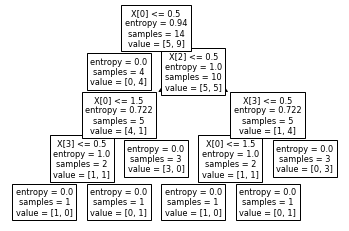

In [8]:
tree.plot_tree(dtlTennis)

In [9]:
print(dtlTennis.predict(Attr_tennis))

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [14]:
# pip install decision-tree-id3 (desactualizado)
import warnings
warnings.filterwarnings("ignore")

from id3 import Id3Estimator
from id3 import export_graphviz

estimator = Id3Estimator()

In [15]:
id3Tennis = Id3Estimator()
id3Tennis = id3Tennis.fit(tennisTrain, ObjTrain)
arbol = export_graphviz(id3Tennis.tree_, 'TennisID3Tree.dot', ['Outlook', 'Temperature', 'Humidity', 'Wind'])

## Ejemplo

In [16]:
df_tennis.keys()[0]

'Outlook'

### Entropía

In [17]:
def entropia(probs):  
    import math
    return sum( [-prob*math.log(prob, 2) for prob in probs] )

def entropia_de_lista(lista):
    from collections import Counter
    cnt = Counter(x for x in lista)   
    num_instancias = len(lista)*1.0 
    probs = [x / num_instancias for x in cnt.values()] 
    return entropia(probs) 
    
entropia_total = entropia_de_lista(df_tennis['PlayTennis'])


### Ganancia de Información de los atributos

In [18]:
def Ganancia_informacion(df, dividir_nombre_atributo, nombre_atributo_objetivo, trace=0):
    
    df_split = df.groupby(dividir_nombre_atributo)
    nobs = len(df.index) * 1.0
    df_agg_ent = df_split.agg({nombre_atributo_objetivo : 
                               [entropia_de_lista, lambda x: len(x)/nobs] })[nombre_atributo_objetivo]
    df_agg_ent.columns = ['Entropia', 'PropObservaciones']
    
    # Calcula la informacion de ganancia:
    entropia1 = sum( df_agg_ent['Entropia'] * df_agg_ent['PropObservaciones'] )
    entropia2 = entropia_de_lista(df[nombre_atributo_objetivo])
    return entropia2 - entropia1

print('Ganancia de informacion para Outlook es :'
      +str( Ganancia_informacion(df_tennis, 'Outlook', 'PlayTennis')),"\n")

Ganancia de informacion para Outlook es :0.2467498197744391 



### Ejercicios

* Calcula la ganancia de información para las variables *Humidity, Wind* y *Temperature*.

In [ ]:
# Tu respuesta

### Algoritmo ID3

Implementación basada en el libro de Tom Mitchel Machine Learning (pag 56).

In [ ]:
def id3(df, nombre_atributo_objetivo, nombre_atributos, clase_defecto=None):
    from collections import Counter
    cnt = Counter(x for x in df[nombre_atributo_objetivo])
    if len(cnt) == 1:
        return next(iter(cnt)) 
    elif df.empty or (not nombre_atributos):
        return clase_defecto  
    else:
        clase_defecto = max(cnt.keys())
        gainz = [Ganancia_informacion(df, attr, nombre_atributo_objetivo) for attr in nombre_atributos] 
        index_max = gainz.index(max(gainz)) 
        mejor_attr = nombre_atributos[index_max]

        arbol = {mejor_attr:{}} 
        nombre_atributos_restantes = [i for i in nombre_atributos if i != mejor_attr]
      
        for attr_val, data_subset in df.groupby(mejor_attr):
            subarbol = id3(data_subset,
                        nombre_atributo_objetivo,
                        nombre_atributos_restantes,
                        clase_defecto)
            arbol[mejor_attr][attr_val] = subarbol
        return arbol

### Predicción de atributos

In [ ]:
nombres_atributos = list(df_tennis.columns)
print("Lista de atributos:", nombres_atributos) 
nombres_atributos.remove('PlayTennis')  
print("Prediccion de atributos:", nombres_atributos)

### Construcción de árboles

In [ ]:
from pprint import pprint
arbol = id3(df_tennis,'PlayTennis',nombres_atributos)
pprint(arbol)

### Ejercicio

* ¿Cuál es el valor del mejor atributo?

In [ ]:
# Tu respuesta

### Exactitud de clasificación

In [ ]:
def clasificacion(instancia, arbol, default=None): 
    
    atributo = next(iter(arbol))      
    print("Key:",arbol.keys()) 
    print("atributo:",atributo) 
   
    if instancia[atributo] in arbol[atributo].keys():  
        resultado = arbol[atributo][instancia[atributo]]
        #print("instancia atributo:",instancia[atributo],"arbolKeys :",arbol[atributo].keys())
        if isinstance(resultado, dict):
            return clasificacion(instancia, resultado)
        else:
            return resultado 
    else:
        return default

In [ ]:
df_tennis['prediccion'] = df_tennis.apply(clasificacion, axis=1, args=(arbol,'No') ) 

print(df_tennis['prediccion'])

In [ ]:
print('La exactitud es:' + str( sum(df_tennis['PlayTennis']==
                                      df_tennis['prediccion'] )/(1.0*len(df_tennis.index)) ))
df_tennis[['PlayTennis', 'prediccion']]

### Exactitud de clasificación: conjunto de entrenamiento / prueba

In [ ]:
pd.options.mode.chained_assignment = None 
datos_entrenamiento = df_tennis.iloc[1:-4] 
datos_prueba  = df_tennis.iloc[-4:] 
arbol_entrenamiento = id3(datos_entrenamiento, 'PlayTennis', nombres_atributos)

datos_prueba['prediccion2'] = datos_prueba.apply(                              
                                          clasificacion, 
                                          axis=1, 
                                          args=(arbol_entrenamiento,'Yes'))

In [ ]:
print ('La exactitud es : ' + str( sum(datos_prueba['PlayTennis']==
                                        datos_prueba['prediccion2'])/(1.0*len(datos_prueba.index)) ))

### Ejercicios

* ¿Explica los anteriores resultados?

In [ ]:
# Tu respuesta